# RPS-$l_2$ explanation showcases

In [4]:
import  numpy as np
import torch
import matplotlib.pyplot as plt


In [5]:
from models.CNN.utils_cifar import load_cifar_2
train_data, test_data = load_cifar_2(use_transform=False)

Load weight matrix and intermediate prediction of tests

In [6]:
path = '../saved_models/base'
file = np.load('{}/model/saved_outputs.npz'.format(path))
intermediate_train = torch.from_numpy(file['intermediate_train'])
intermediate_test = torch.from_numpy(file['intermediate_test'])
labels_train = file['labels_train']
labels_test = file['labels_test']

pred_train = file['pred_train'].squeeze()
pred_test = file['pred_test'].squeeze()



In [7]:
weight_matrix_rep = np.load('{}/calculated_weights/representer_weight_matrix.npz'.format(path), allow_pickle=True)['weight_matrix']



In [8]:
def get_representer_order(weight_matrix_rep_new, test_point=None):
    tmp = weight_matrix_rep_new[:,0] * np.dot(intermediate_train,
                                           intermediate_test[test_point,:])
    if labels_test[test_point] == 1:
        pos_idx = np.flip(np.argsort(tmp), axis=0)
        neg_idx = np.argsort(tmp)
    else:
        neg_idx = np.flip(np.argsort(tmp), axis=0)
        pos_idx = np.argsort(tmp)
    return pos_idx, neg_idx

## Class-level identical explanations (different samples, same explanations)
Figure 1(b)

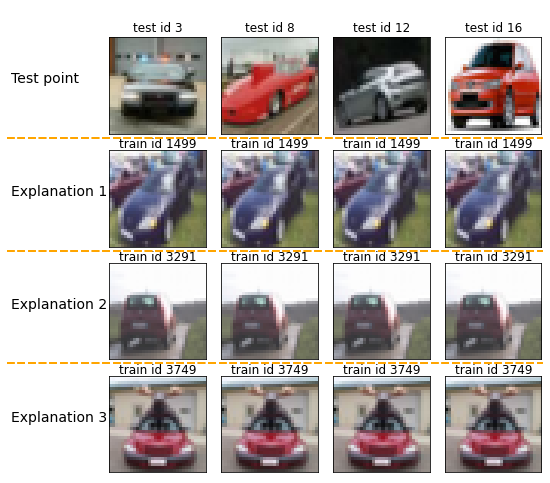

In [6]:
import matplotlib.transforms as mtrans
test_points = [3,8,12,16]
fig, ax = plt.subplots(4, 4, figsize=(8,8))
idx=0
for test_point in test_points:
    true_class = test_data[test_point][1]
    pos_idx, neg_idx = get_representer_order(weight_matrix_rep, test_point)
    k = 3
    #change to 2,7 when compare to ours

    image = test_data[test_point][0]


    ax[0,idx].imshow(image)
    ax[0,idx].set_title('\ntest id %d'%(test_point))
    ax[0,idx].set_xticks(())
    ax[0,idx].set_yticks(())
    ax[0,0].set_ylabel('Test point', fontsize=14, rotation=0, labelpad=64)

    # ax[1,0].get_xaxis().set_visible(False)
    # ax[1,0].set_yticks(())
    # ax[1,0].set_xticks(())
    # ax[1,0].axis('off')

    # Representer values (first three columns)
    for i in range(k):
        # Positive ones
        our_idx = pos_idx[i]

        ax[i+1, idx].imshow(train_data[our_idx][0])
        ax[i+1, idx].set_title('\ntrain id %d' % our_idx, pad=0)
        if idx ==0:
            ax[i+1, idx].set_ylabel('Explanation {}'.format(i+1),
                                    fontsize=14, rotation=0, labelpad=50)
        ax[i+1, idx].set_xticks(())
        ax[i+1, idx].set_yticks(())
        ax[i+1, idx].get_yaxis().set_visible(True)
    idx+=1
    for y in [0.705,0.51,0.315]:
        line = plt.Line2D([-0.04,0.89],[y,y],
                          color="orange",linestyle='dashed',linewidth=2)
        fig.add_artist(line)

plt.subplots_adjust(wspace=0.01,hspace=0.17)# plt.tight_layout()
plt.savefig('figs/img_show_case_class_level.pdf', dpi=200, bbox_inches='tight')

## Explanation changes with different $\lambda$ (same sample, different explanations)
Figure 1 (a)

In [7]:
lmbd_list =[1e-05, 0.0001, 0.01,0.1]
path= '../saved_models/base'
weight_matrix_reps_new = [np.load('{}/calculated_weights/representer_weight_lambda_{}.npz'
                              .format(path,lmbd), allow_pickle=True)['weight_matrix']
                      for lmbd in lmbd_list]

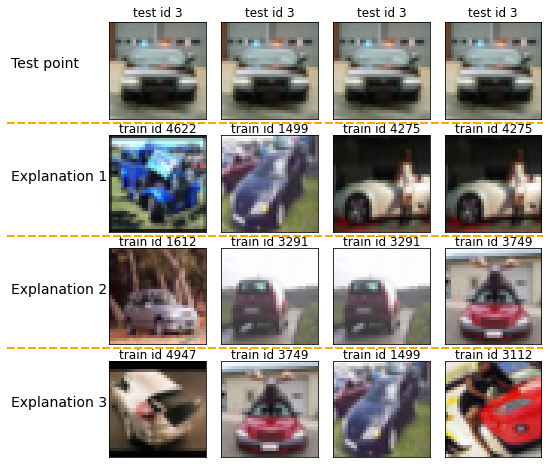

In [8]:
test_point = 3
fig, ax = plt.subplots(4, 4, figsize=(8,8))
idx=0
for weight_matrix_rep_new in weight_matrix_reps_new:
    true_class = test_data[test_point][1]
    pos_idx, neg_idx = get_representer_order(weight_matrix_rep_new, test_point)
    k = 3
    image = test_data[test_point][0]


    ax[0,idx].imshow(image)
    ax[0,idx].set_title('test id %d'%(test_point))
    ax[0,0].set_ylabel('Test point', fontsize=14, rotation=0, labelpad=64)
    ax[0,idx].set_xticks(())
    ax[0,idx].set_yticks(())
    for i in range(k):
        our_idx = pos_idx[i]

        ax[i+1, idx].imshow(train_data[our_idx][0])
        ax[i+1, idx].set_title('train id %d'%(our_idx), pad=0)
        ax[i+1, idx].set_xticks(())
        ax[i+1, idx].set_yticks(())
        if idx ==0:
            ax[i+1, idx].set_ylabel('Explanation {}'.format(i+1),
                                    fontsize=14, rotation=0, labelpad=50)
    idx+=1
    for y in [0.705,0.51,0.315]:
        line = plt.Line2D([-0.04,0.89],[y,y],
                          color="orange",linestyle='dashed',linewidth=2)
        fig.add_artist(line)

plt.subplots_adjust(wspace=0.01,hspace=0.17)
plt.savefig('figs/img_show_case_different_runs.pdf',bbox_inches='tight', dpi=200)


# Sensitivity with the $l_2$ weight $\lambda$
Figure 6

In [9]:
lmbd_list = [0.001, 0.01,0.1,1,10]
weight_matrix_rep_list =  [np.load('{}/calculated_weights/representer_weight_lambda_{}.npz'
                              .format(path,lmbd), allow_pickle=True)['weight_matrix']
                      for lmbd in lmbd_list]



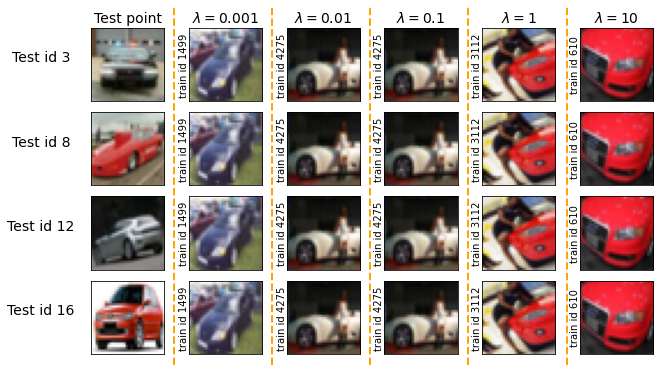

In [45]:
fig, ax = plt.subplots(4,6, figsize=(10.5,6))
idx=0
test_points = [3,8,12,16]

for test_point in test_points:
    true_class = test_data[test_point][1]
    image = test_data[test_point][0]


    ax[idx,0].imshow(image)
    ax[idx,0].set_ylabel('Test id %d'%(test_point), labelpad=50, rotation=0, fontsize=14)
    ax[idx,0].set_xticks(())
    ax[idx,0].set_yticks(())
    ax[0,0].set_title('Test point', fontsize=14, rotation=0)
    idx+=1

idx = 0
for lmbd_idx in range(len(lmbd_list)):
    ax[0, lmbd_idx+1].set_title('$\lambda = {}$'.format(lmbd_list[lmbd_idx]), fontsize=14, rotation=0)
    for test_pt in test_points:
        true_class = test_data[test_point][1]
        pos_idx, neg_idx = get_representer_order(weight_matrix_rep_list[lmbd_idx],
                                       test_point)
        rep_idx = pos_idx[0]
        ax[idx, lmbd_idx+1].imshow(train_data[rep_idx][0])
        ax[idx, lmbd_idx+1].set_ylabel('\ntrain id %d' % rep_idx, labelpad=0, rotation=90)
        ax[idx, lmbd_idx+1].set_xticks(())
        ax[idx, lmbd_idx+1].set_yticks(())
        idx+=1
    idx=0
for x in [0.25,0.38,0.51,0.64,0.77]:
    line = plt.Line2D([x,x],[0.1,0.93],
                      color="orange",linestyle='dashed',linewidth=2)
    fig.add_artist(line)
plt.subplots_adjust(wspace=0.01,hspace=0.15)
plt.savefig('figs/img_different_lmbd.pdf'.format(lmbd_list[lmbd_idx]),bbox_inches='tight', dpi=200)
plt.show()

